#### Reading the wind speed file.

In [1]:
# info here: https://machinelearningmastery.com/tutorial-first-neural-network-python-keras/
# http://www.smartcomputerlab.org/m6/Lab1.regression.tf.keras.pdf


In [2]:
# Data frames.
import pandas as pd

# Plotting.
import matplotlib.pyplot as plt
import seaborn as sns

# Machine learning.
import keras as kr
import tensorflow as tf

import numpy as np

#### Loading data.

In [3]:
# Limiting to .3 decimal points.
np.set_printoptions(formatter={'float': lambda x: "{0:0.3f}".format(x)})

# Setting windspeedFile
windspeedFile = "Windspeed.txt"
#windspeedFile = "Windspeed-badData.txt"

# Reading windspeedFile, skipping headings
dataset = np.loadtxt(windspeedFile, delimiter=",", skiprows=1)

# Windspeed data.
X = dataset[:,0]
# Power data.
y = dataset[:,1]

#### Some functions.

In [4]:
def getModelData(dataset, predictions):
    '''
    Will display the dataset with predictions and expected.
    '''
    if (len(dataset.shape) == 1):
        for i in range(len(dataset)):
            print('%.3f => %.3f (expected %.3f)' % (dataset[i], predictions[i], y[i]))
    else:
        for i in range(len(dataset)):
            print('%.3f => %.3f (expected %.3f)' % (dataset[i][1], predictions[i][1], y[i]))

def getWindspeed():
    '''
    Get request for windspeed value.
    '''
    import requests
    URL = "http://127.0.0.1:5000/api/windspeed"
    
    # sending get request and saving the response as response object 
    r = requests.get(url = URL) 

    # extracting data in json format 
    data = r.json()
    windspeed = data['value']
    print("Windspeed: ", windspeed)
    return windspeed


def predictPower(windspeed):
    '''
    Will display the predicted power for data generated with linear regression.
    '''
    # make a prediction
    aValue = [value]
    ynew = model.predict(aValue)

    print("Power prediction: %.3f" % ynew)
    
def predictPowerPR(poly, windspeed):
    '''
    Will display the predicted power for data generated with polynomial regression.
    '''
    # make a pre
    value = np.array([windspeed])
    aValue = poly.fit_transform(value.reshape(-1,1))
    ynew = model.predict(aValue)

    print("Power prediction: %.3f" % ynew[0][1])

### Set up

In [5]:
numEpochs = 100

# Linear Regression

In [22]:
# Create model.
from keras.models import Sequential
from keras.layers import Dense

thisShape = 1

model = Sequential()
model.add(Dense(12, input_dim=thisShape, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(thisShape, activation='relu'))
    

# Train model.
optimizer = tf.keras.optimizers.Adam(learning_rate=1e-3)
model.compile(optimizer=optimizer, loss='mean_squared_error')
tf_history = model.fit(X, y, epochs=numEpochs, verbose=True)
    

Epoch 1/100
16/16 [==============================] - 0s 687us/step - loss: 3751.9128
Epoch 2/100
16/16 [==============================] - 0s 750us/step - loss: 3593.4534
Epoch 3/100
16/16 [==============================] - 0s 750us/step - loss: 3453.1362
Epoch 4/100
16/16 [==============================] - 0s 750us/step - loss: 3356.0681
Epoch 5/100
16/16 [==============================] - 0s 750us/step - loss: 3255.8220
Epoch 6/100
16/16 [==============================] - 0s 687us/step - loss: 3149.2585
Epoch 7/100
16/16 [==============================] - 0s 813us/step - loss: 3034.2937
Epoch 8/100
16/16 [==============================] - 0s 750us/step - loss: 2908.7957
Epoch 9/100
16/16 [==============================] - 0s 750us/step - loss: 2765.2148
Epoch 10/100
16/16 [==============================] - 0s 625us/step - loss: 2616.1833
Epoch 11/100
16/16 [==============================] - 0s 500us/step - loss: 2455.8440
Epoch 12/100
16/16 [==============================] - 0s 688us/

16/16 [==============================] - 0s 500us/step - loss: 296.7668
Epoch 98/100
16/16 [==============================] - 0s 875us/step - loss: 296.2094
Epoch 99/100
16/16 [==============================] - 0s 625us/step - loss: 296.1521
Epoch 100/100
16/16 [==============================] - 0s 563us/step - loss: 295.3461


In [23]:
# Prediction.
lr_prediction = model.predict(X)

In [24]:
value = 15#getWindspeed()
predictPower(value)

Power prediction: 64.273


# PolynomialFeatures

In [25]:
# PolynomialFeatures.
polyDegree = 3


from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(degree=polyDegree)

X_2 = poly.fit_transform(X.reshape(-1,1))

In [26]:
# Create model.
from keras.models import Sequential
from keras.layers import Dense

thisShape = 1+polyDegree

model = Sequential()
model.add(Dense(64, input_dim=thisShape, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(thisShape, activation='relu'))
    

# Train model.
optimizer = tf.keras.optimizers.Adam(learning_rate=1e-3)
model.compile(optimizer=optimizer, loss='mean_squared_error')
pr_history = model.fit(X_2, y, epochs=numEpochs, verbose=True)
    

Epoch 1/100
16/16 [==============================] - 0s 813us/step - loss: 54122.0547
Epoch 2/100
16/16 [==============================] - 0s 875us/step - loss: 1872.1624
Epoch 3/100
16/16 [==============================] - 0s 814us/step - loss: 1583.0012
Epoch 4/100
16/16 [==============================] - 0s 877us/step - loss: 1475.9634
Epoch 5/100
16/16 [==============================] - 0s 812us/step - loss: 1432.9088
Epoch 6/100
16/16 [==============================] - 0s 873us/step - loss: 1407.0122
Epoch 7/100
16/16 [==============================] - 0s 750us/step - loss: 1409.0370
Epoch 8/100
16/16 [==============================] - 0s 562us/step - loss: 1379.0210
Epoch 9/100
16/16 [==============================] - 0s 625us/step - loss: 1370.6862
Epoch 10/100
16/16 [==============================] - 0s 813us/step - loss: 1356.2971
Epoch 11/100
16/16 [==============================] - 0s 750us/step - loss: 1389.2988
Epoch 12/100
16/16 [==============================] - 0s 750us

16/16 [==============================] - 0s 687us/step - loss: 88.6446
Epoch 98/100
16/16 [==============================] - 0s 688us/step - loss: 112.6711
Epoch 99/100
16/16 [==============================] - 0s 625us/step - loss: 163.9515
Epoch 100/100
16/16 [==============================] - 0s 687us/step - loss: 394.0410


In [27]:
# Prediction.
rp_predictions = model.predict(X_2)

## Display

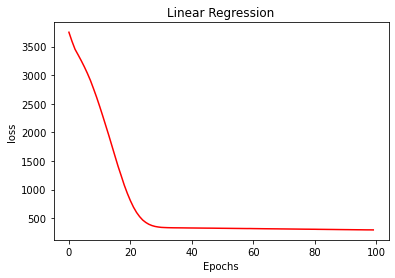

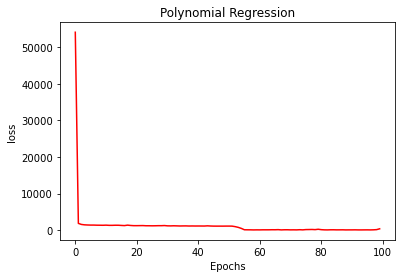

In [28]:
# displayLoss():
# displayLoss():
plt.title("Linear Regression")
plt.plot(tf_history.history['loss'], color="red")
plt.xlabel('Epochs')
plt.ylabel('loss')
plt.show()

plt.title("Polynomial Regression")
plt.plot(pr_history.history['loss'], color="red")
plt.xlabel('Epochs')
plt.ylabel('loss')
plt.show()

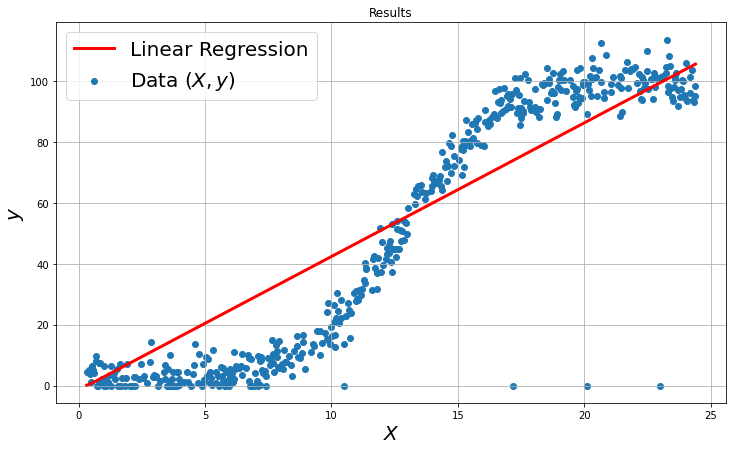

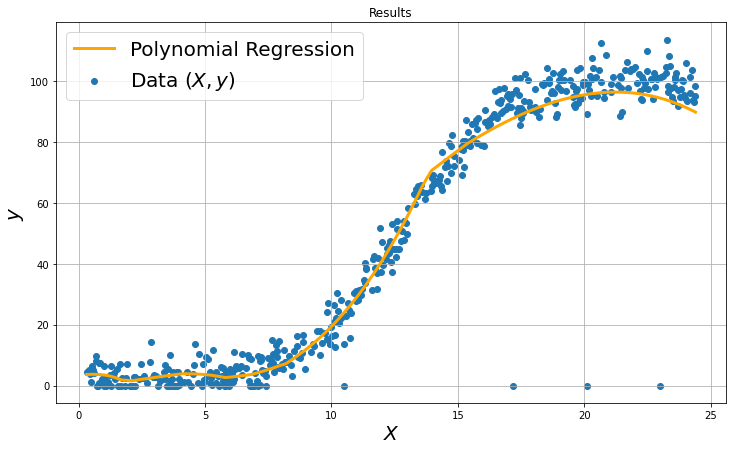

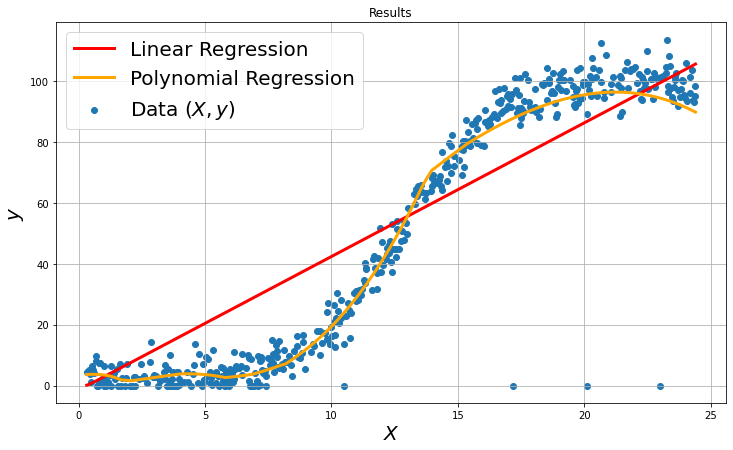

In [29]:
# displayPlot():
plt.figure(figsize=(12,7))
plt.title('Results')
plt.scatter(X_2[:,1], y, label='Data $(X, y)$')
plt.plot(X, lr_prediction, color='red', label='Linear Regression',linewidth=3.0)
#plt.plot(X_2[:,1], rp_predictions[:,1], color='orange', label='Polynomial Regression',linewidth=3.0)
plt.xlabel('$X$', fontsize=20)
plt.ylabel('$y$', fontsize=20)
plt.grid(True)
plt.legend(fontsize=20)
plt.show()

plt.figure(figsize=(12,7))
plt.title('Results')
plt.scatter(X_2[:,1], y, label='Data $(X, y)$')
#plt.plot(X, y_hat, color='red', label='Linear Regression',linewidth=3.0)
plt.plot(X_2[:,1], rp_predictions[:,1], color='orange', label='Polynomial Regression',linewidth=3.0)
plt.xlabel('$X$', fontsize=20)
plt.ylabel('$y$', fontsize=20)
plt.grid(True)
plt.legend(fontsize=20)
plt.show()

plt.figure(figsize=(12,7))
plt.title('Results')
plt.scatter(X_2[:,1], y, label='Data $(X, y)$')
plt.plot(X, lr_prediction, color='red', label='Linear Regression',linewidth=3.0)
plt.plot(X_2[:,1], rp_predictions[:,1], color='orange', label='Polynomial Regression',linewidth=3.0)
plt.xlabel('$X$', fontsize=20)
plt.ylabel('$y$', fontsize=20)
plt.grid(True)
plt.legend(fontsize=20)
plt.show()

In [30]:
windspeed = 15#getWindspeed()
predictPowerPR(poly, value)

Power prediction: 77.093
